In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

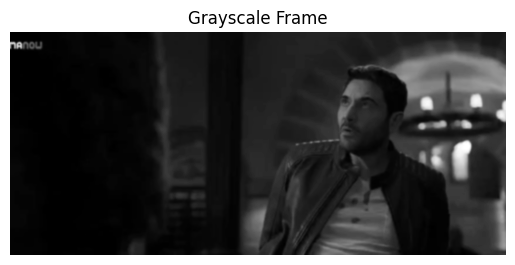

In [7]:
# read a video
video_path = os.path.join('vids', 'welad rizk.mp4')
video = cv2.VideoCapture(video_path)
video.set(cv2.CAP_PROP_FPS, 30)
video.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
video.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# read the first frame
ret, frame = video.read()
if not ret:
    print("Failed to read video")
    exit()
# convert to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# apply Gaussian blur
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# display the result

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Frame")
plt.axis('off')
plt.show()

In [12]:
import cv2
import os

def extract_frames(video_path, save_dir, fps_limit=10):
    cap = cv2.VideoCapture(video_path)
    video_fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(video_fps / fps_limit)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    count = 0
    saved = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_interval == 0:
            resized = cv2.resize(frame, (640, 480))
            cv2.imwrite(os.path.join(save_dir, f'frame_{saved:04}.png'), resized)
            saved += 1
        count += 1
    cap.release()


In [13]:
extract_frames("./vids/x-meraty.mp4", "./output_frames/x-meraty", fps_limit=10)

In [16]:
extract_frames("./vids/2rd_el_nefak.mp4", "./output_frames/2rd_el_nefak", fps_limit=10)

In [14]:
import cv2

def detect_face(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return len(faces), faces


In [17]:
detect_face("./output_frames/2rd_el_nefak/frame_0107.png")

(4,
 array([[214, 376,  70,  70],
        [345,  68, 218, 218],
        [366, 287,  79,  79],
        [157, 131, 152, 152]]))